In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

HSV (hue, saturation, value) colorspace is a model to represent the colorspace similar to the RGB color model. Since the hue channel models the color type, it is very useful in image processing tasks that need to segment objects based on its color. Variation of the saturation goes from unsaturated to represent shades of gray and fully saturated (no white component). Value channel describes the brightness or the intensity of the color. Next image shows the HSV cylinder.

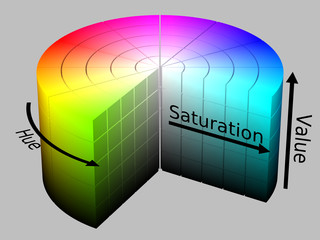

By SharkDderivative work: SharkD [CC BY-SA 3.0 or GFDL], via Wikimedia Commons

Reference: https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html

In [2]:
def hsv_filter(filename, lower, upper):
    """
    Do HSV filtering. Return tuple of original image and the mask
    - Uses HSV as it is easier to represent color than in BGR
    - Requires arrays of lower and upper limit of values that we want to get
    - Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
    """
    img = cv2.imread(filename)
    
    # conversion of original colorspace to HSV
    converted = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    
    # creating mask based on specified upper and lower limit
    mask = cv2.inRange(converted, lower, upper)
    
    return img, mask
    
def threshold_test_plot(img, mask, orig_filename = ""):
    """
    Function to plot the masking result that we want to use in thin section component fraction calculation.
    - Outputs original, mask, and masked image plot
    - If available, filename will become plot title
    """
    # apply bitwise_AND operator on original image and the mask
    res = cv2.bitwise_and(img, img, mask = mask)
    
    collection = [img, mask, res]
    
    # Conversion from cv2's BGR to RGB for matplotlib plotting only. 
    # cv2 noob here so let me know if there's a better way :))
    collection_rgb = []
    
    for image in collection:
        image_converted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        collection_rgb.append(image_converted)
        
    fig, axs = plt.subplots(ncols = 3, figsize= (15, 15))

    axs[0].imshow(collection_rgb[0])
    axs[0].set_title(os.path.basename(orig_filename) + " Original Image")
    axs[1].imshow(collection_rgb[1])
    axs[1].set_title("Mask")
    axs[2].imshow(collection_rgb[2])
    axs[2].set_title(os.path.basename(orig_filename) + " Masking Result")
    
def compute_fraction(mask):
    """
    Function to compute the fraction using the binary mask object
    - returns float
    """
    # 255 is the white part of a binary image
    frac = np.mean(mask == 255)
    return frac

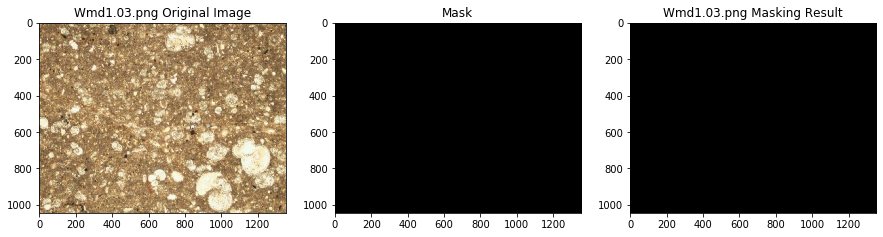

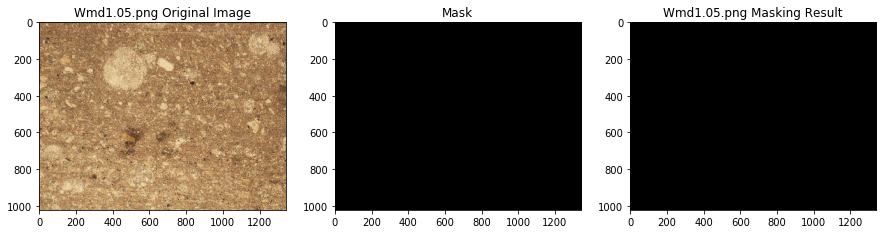

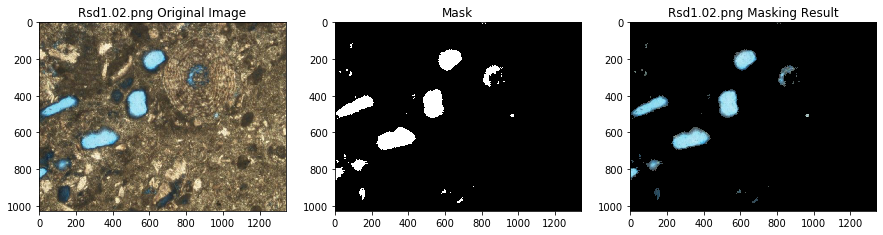

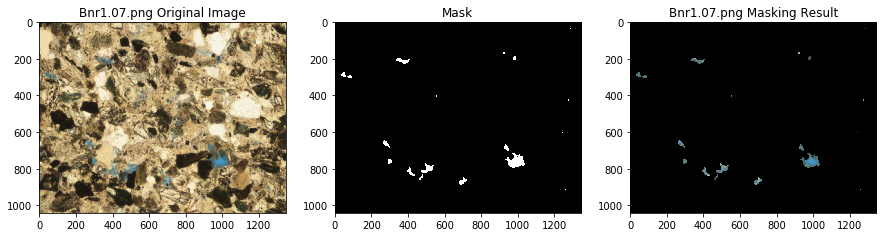

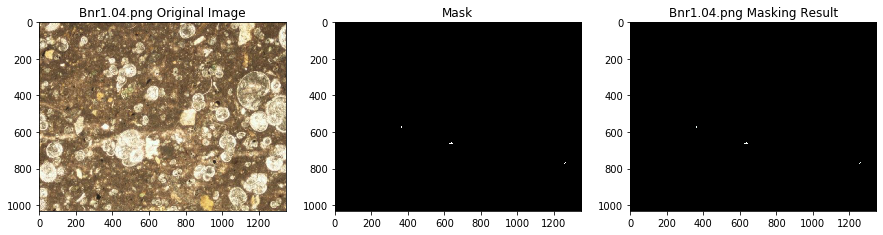

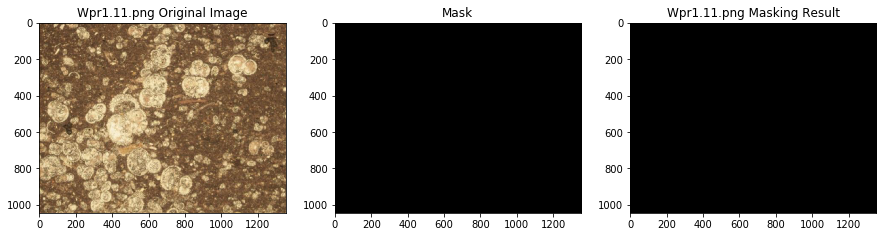

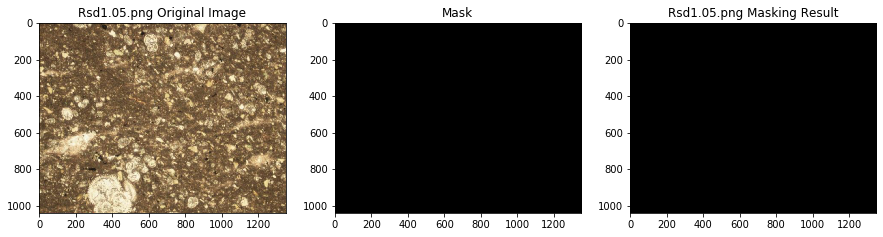

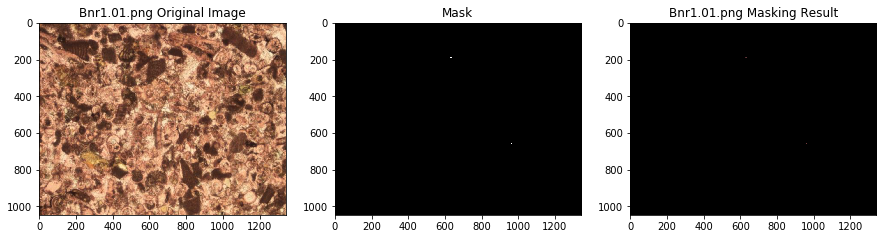

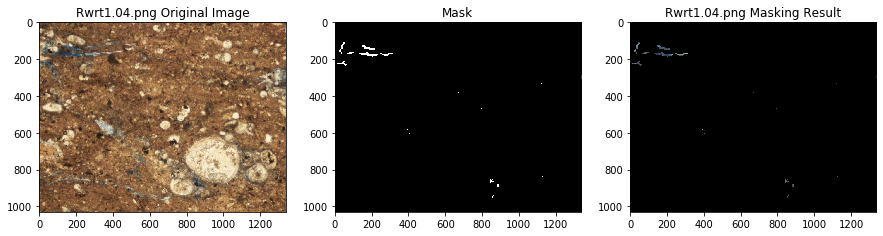

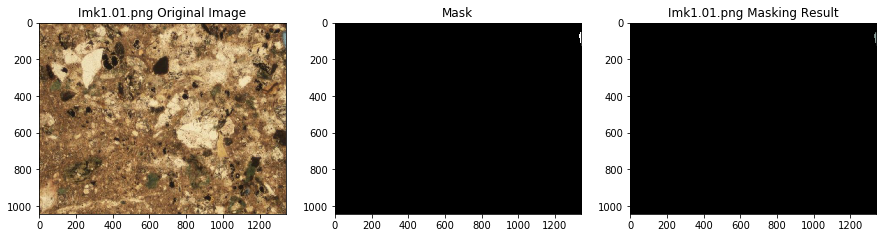

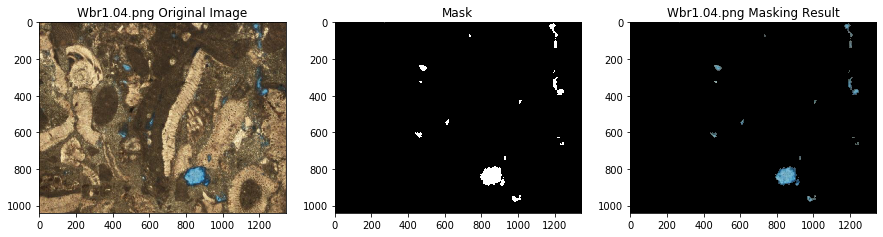

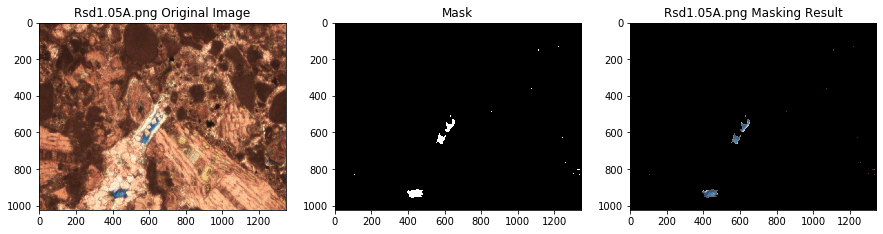

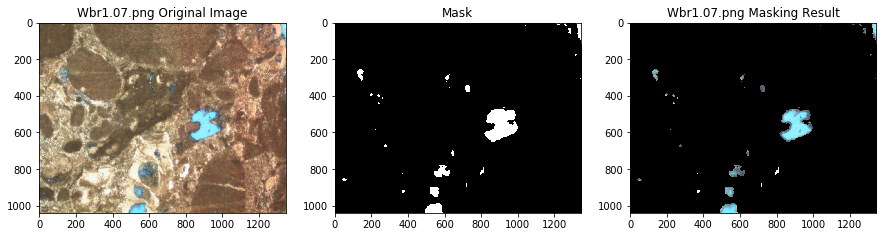

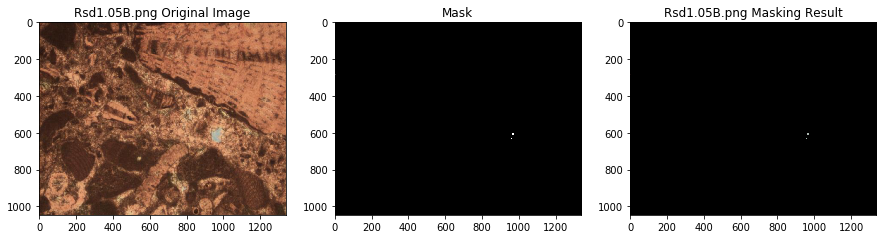

In [3]:
lower_blue = np.array([70,0,80])
upper_blue = np.array([179,255,255])

path = "supiori_thinsection"

files = os.listdir(path)
path_files = [path + "/" + filename for filename in files]

img_dict = dict()

# create dictionary that uses filename and (img, mask) tuple returned by hsv_filter() as key-value pair
for filename in path_files:
    img_dict[filename] = hsv_filter(filename, lower_blue, upper_blue)

# plot by traversing through the dictionary
for key in img_dict:
    threshold_test_plot(img = img_dict[key][0], mask = img_dict[key][1], orig_filename = key)

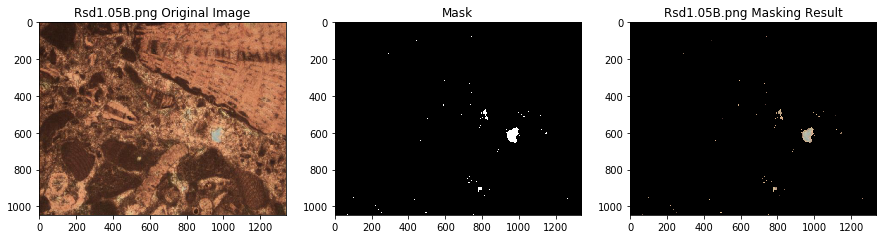

In [4]:
Rsd105B = 'supiori_thinsection/Rsd1.05B.png'

lower_blue_Rsd105B = np.array([0,0,0])
upper_blue_Rsd105B = np.array([179,95,255])

img_dict[Rsd105B] = hsv_filter(Rsd105B, lower_blue_Rsd105B, upper_blue_Rsd105B)

threshold_test_plot(img = img_dict[Rsd105B][0], mask = img_dict[Rsd105B][1], orig_filename = Rsd105B)

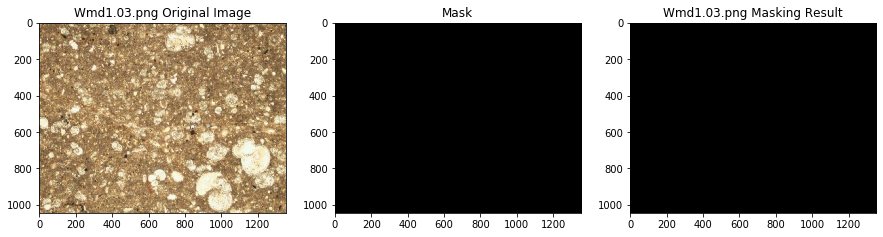

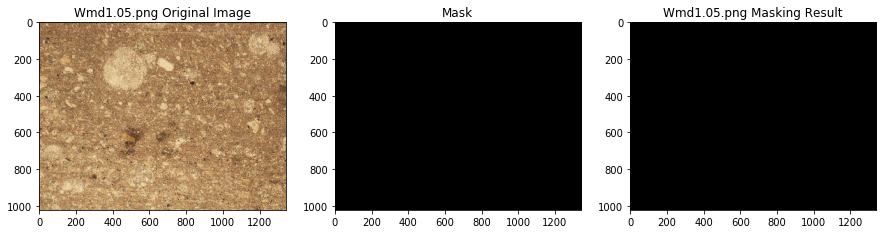

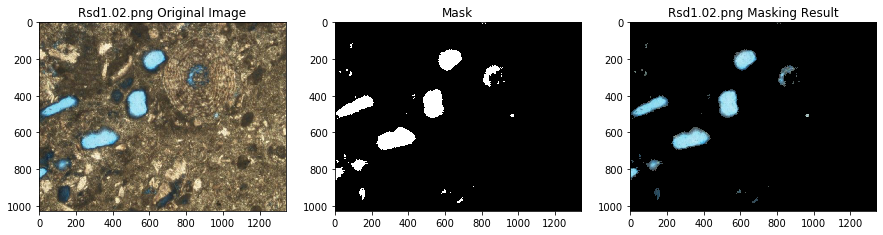

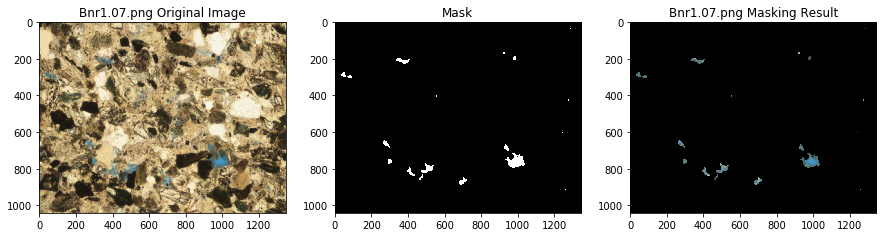

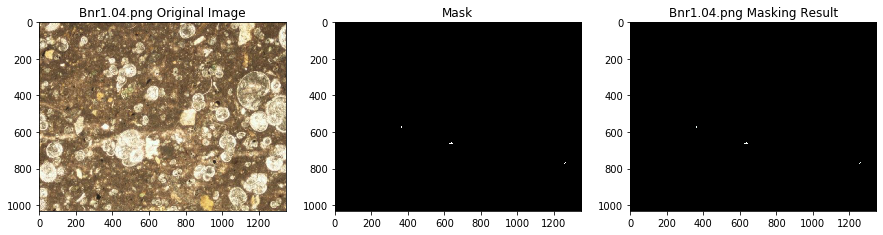

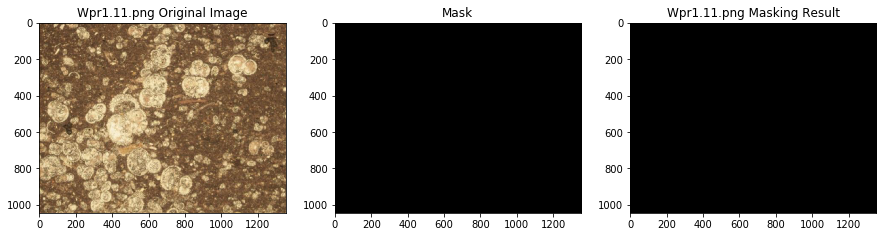

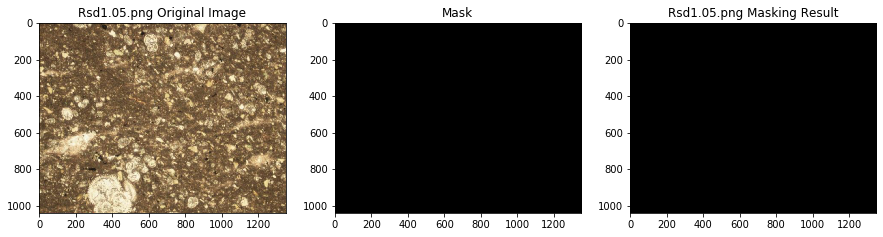

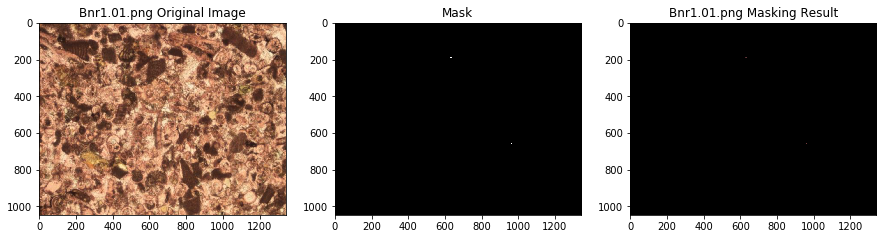

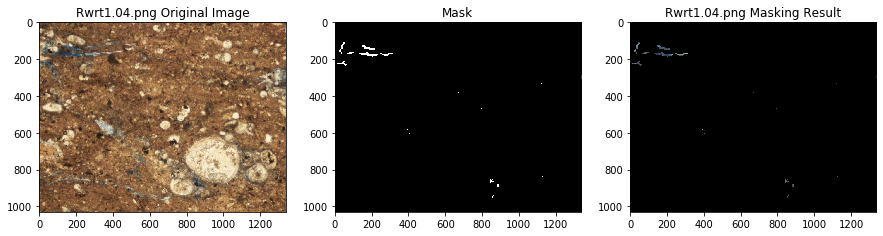

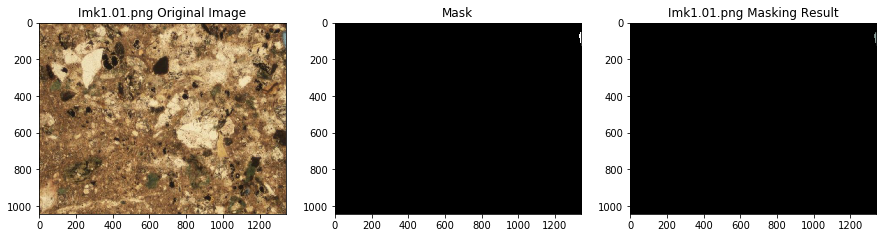

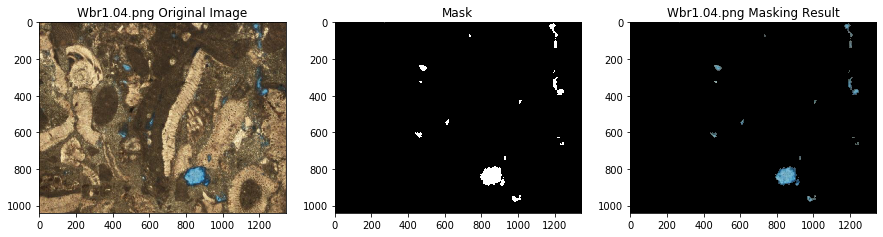

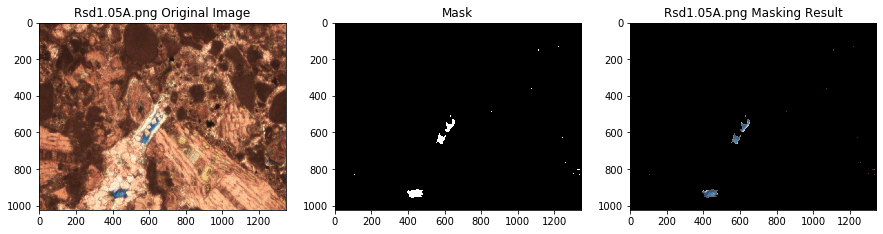

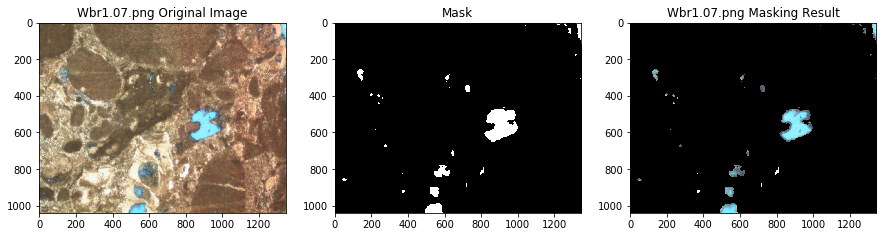

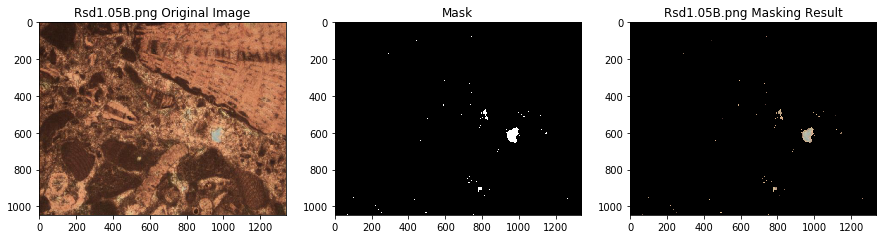

In [5]:
for key in img_dict:
    threshold_test_plot(img = img_dict[key][0], mask = img_dict[key][1], orig_filename = key)

The porosity of the sample image based on the mask is 20.94%
The core plug sample porosity is 20.1%


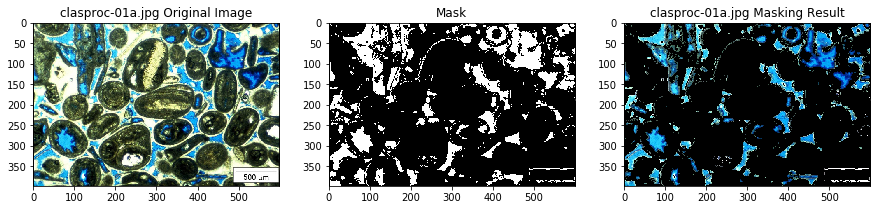

In [37]:
# test on calibrated thin section: http://www.beg.utexas.edu/lmod/_IOL-CM07/old-4.29.03/cm07-step05.htm
# Courtesy of F. Jerry Lucia, BEG at UT Austin
# Based on the text, the measured porosity of the core plug for this sample is 20.1%
test_img = 'clasproc-01a.jpg'

imgtest, masktest = hsv_filter(test_img, lower_blue, upper_blue)

threshold_test_plot(imgtest, masktest, test_img)

portest = compute_fraction(masktest)

print('The porosity of the sample image based on the mask is ', round(portest * 100, 2), '%', sep = '')
print('The core plug sample porosity is 20.1%')

In [33]:
por_dict = dict()

print('Filename', '\t', 'Porosity (%)')
print('=' * len('Filename'), '\t', '=' * len('Porosity (%)'))
for key in img_dict:
    por_dict[key] = compute_fraction(img_dict[key][1])
    print (os.path.basename(key), '\t', round(por_dict[key] * 100, 2))

Filename 	 Porosity (%)
======== 	 ============
Wmd1.03.png 	 0.0
Wmd1.05.png 	 0.0
Rsd1.02.png 	 4.97
Bnr1.07.png 	 0.98
Bnr1.04.png 	 0.02
Wpr1.11.png 	 0.0
Rsd1.05.png 	 0.0
Bnr1.01.png 	 0.01
Rwrt1.04.png 	 0.36
Imk1.01.png 	 0.06
Wbr1.04.png 	 1.35
Rsd1.05A.png 	 0.5
Wbr1.07.png 	 2.94
Rsd1.05B.png 	 0.44
